In [44]:
import cv2
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
import numpy as np
import time
%matplotlib inline

import matplotlib

matplotlib.rcParams['figure.figsize'] = (6.0, 6.0)
matplotlib.rcParams['image.cmap'] = 'gray'

DATA_PATH = "/Users/admin/Iqbal/Study/OpenCV/LearnOpenCV/src/res/opencv-courses/"

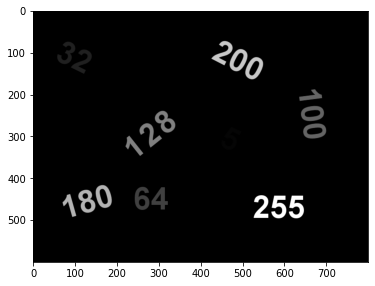

In [45]:
im = cv2.imread(DATA_PATH + "images/threshold.png", cv2.IMREAD_GRAYSCALE)
plot.imshow(im)

Time taken 0.7582452297210693


Text(0.5, 1.0, 'Thresholded Image')

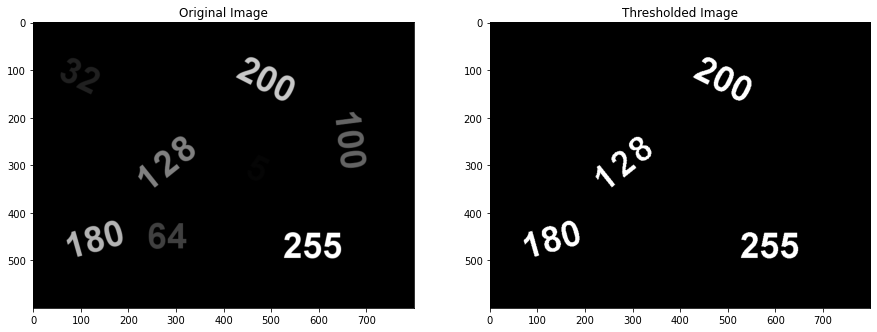

In [46]:
## Threshold using Loop

def thresholdingUsingLoop(src, thresh, maxValue):
    dst = src.copy()
    rows, column = im.shape[:2]
    for i in range(rows):
        for j in range(column):
            if src[i, j] > thresh:
                dst[i, j] = maxValue
            else:
                dst[i, j] = 0
    return dst


t = time.time()
dst = thresholdingUsingLoop(im, 127, 255)
print("Time taken {}".format(time.time() - t))

plt.figure(figsize=[15, 15])
plt.subplot(121);
plt.imshow(im);
plt.title("Original Image")
plt.subplot(122);
plt.imshow(dst);
plt.title("Thresholded Image")

Time taken 0.001199960708618164


Text(0.5, 1.0, 'Thresholded Image')

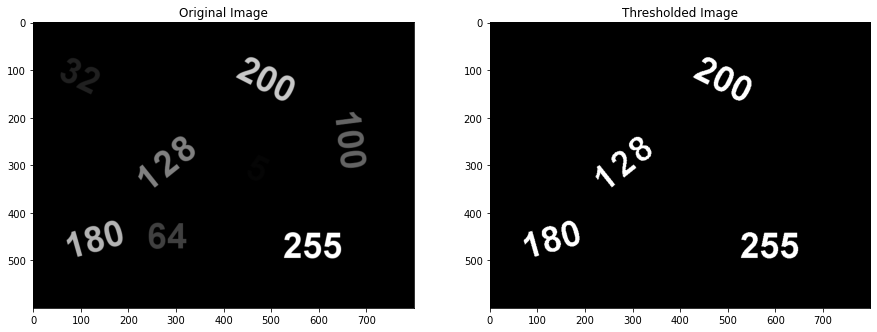

In [47]:
## Thresholding using Vectorization

def thresholdingUsingVectorization(src, thresh, maxValue):
    dst = np.zeros_like(src)

    thresholdingPixels = src > thresh

    dst[thresholdingPixels] = maxValue

    return dst


t = time.time()
dst = thresholdingUsingVectorization(im, 127, 255)
print("Time taken {}".format(time.time() - t))

plt.figure(figsize=[15, 15])
plt.subplot(121);
plt.imshow(im);
plt.title("Original Image")
plt.subplot(122);
plt.imshow(dst);
plt.title("Thresholded Image")

Time taken 0.0004143714904785156


Text(0.5, 1.0, 'Thresholded Image')

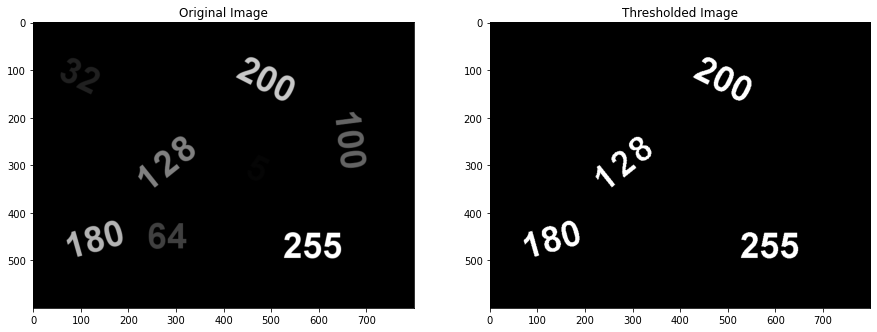

In [48]:
## Thresholding using OpenCV
t = time.time()
retval, dst = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)
print("Time taken {}".format(time.time() - t))

plt.figure(figsize=[15, 15])
plt.subplot(121);
plt.imshow(im);
plt.title("Original Image")
plt.subplot(122);
plt.imshow(dst);
plt.title("Thresholded Image")

In [49]:
## Comparison with builtIn vs ours
time_loop = 0
time_vector = 0
time_opencv = 0
n_samples = 10
for i in range(n_samples):
    t = time.time()
    dst = thresholdingUsingLoop(im, 127, 255)
    time_loop += time.time() - t

    t = time.time()
    dst = thresholdingUsingVectorization(im, 127, 255)
    time_vector += time.time() - t

    t = time.time()
    th, dst = cv2.threshold(im, 127, 255, cv2.THRESH_BINARY)
    time_opencv += time.time() - t

print("Average Time taken for Loop {}".format(time_loop / n_samples))
print("Average Time taken for Vector {}".format(time_vector / n_samples))
print("Average Time taken for BuildIn {}".format(time_opencv / n_samples))

Time taken for Loop 7.446725845336914
Time taken for Vector 0.0028984546661376953
Time taken for BuildIn 0.001241922378540039


Threshold value 100 and maxValue 150


Text(0.5, 1.0, 'Threshold Masked')

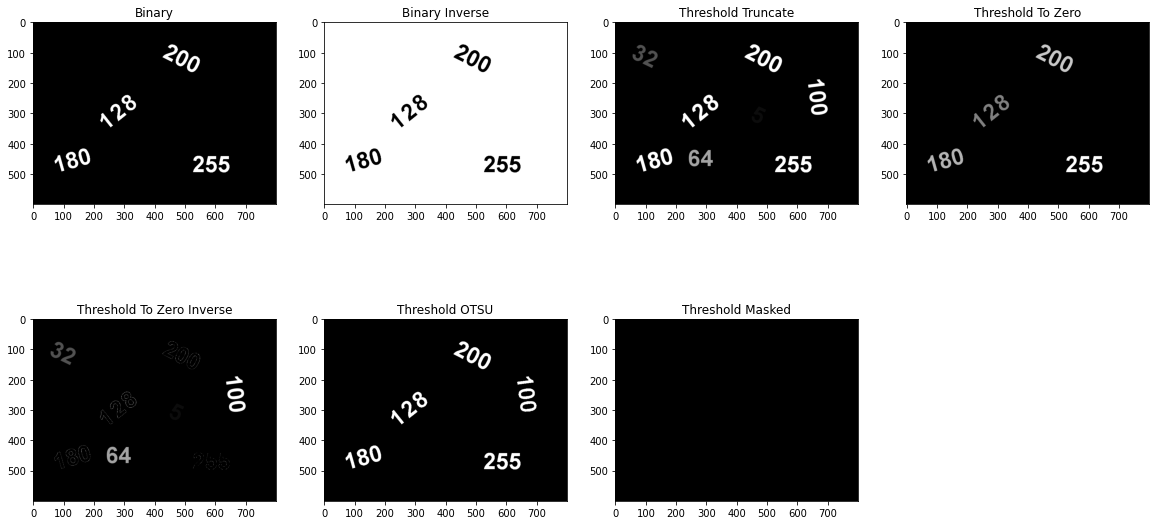

In [62]:
# Other thresholding types

thresh = 100
maxValue = 150

retval, bin = cv2.threshold(im, thresh, maxValue, cv2.THRESH_BINARY)
retval, bin_inv = cv2.threshold(im, thresh, maxValue, cv2.THRESH_BINARY_INV)
retval, bin_trunc = cv2.threshold(im, thresh, maxValue, cv2.THRESH_TRUNC)
retval, th_mask = cv2.threshold(im, thresh, maxValue, cv2.THRESH_MASK)
retval, th_tozero = cv2.threshold(im, thresh, maxValue, cv2.THRESH_TOZERO)
retval, th_tozero_inv = cv2.threshold(im, thresh, maxValue, cv2.THRESH_TOZERO_INV)
retval, th_otsu = cv2.threshold(im, thresh, maxValue, cv2.THRESH_OTSU)
retval, th_tri = cv2.threshold(im, thresh, maxValue, cv2.THRESH_TRIANGLE)

print("Threshold value {} and maxValue {}".format(thresh,maxValue))
plt.figure(figsize=[20,10])
plt.subplot(241);plt.imshow(bin);plt.title("Binary")
plt.subplot(242);plt.imshow(bin_inv);plt.title("Binary Inverse")
plt.subplot(243);plt.imshow(bin_trunc);plt.title("Threshold Truncate")
plt.subplot(244);plt.imshow(th_tozero);plt.title("Threshold To Zero")
plt.subplot(245);plt.imshow(th_tozero_inv);plt.title("Threshold To Zero Inverse")
plt.subplot(246);plt.imshow(th_otsu);plt.title("Threshold OTSU")
plt.subplot(247);plt.imshow(th_tri);plt.title("Threshold Triangle")
plt.subplot(247);plt.imshow(th_mask);plt.title("Threshold Masked")

In [ ]:
# With trackbar

def thresholdChange(*args):
    

cv2.createTrackbar("Threshold","Threshold Adjust",thresh,100,thresholdChange)